**Exercise 2.10.20 (Computer Experiment)**.  Suppose a coin has probability $p$ of falling heads.  If we flip the coin many times, we would expect the proportion of heads to be near $p$.  We will make this formal later.  Take $p = .3$  and $n = 1000$ and simulate $n$ coin flips.  Plot the proportion of heads as a function of $n$.  Repeat for $p = .03$.

In [ ]:
import numpy as np

np.random.seed(0)

n=1000
X1=np.where(np.random.uniform(low=0, high=1, size=n)<0.3, 1, 0)
X2=np.where(np.random.uniform(low=0,high=1, size=n)<0.03, 1,0)

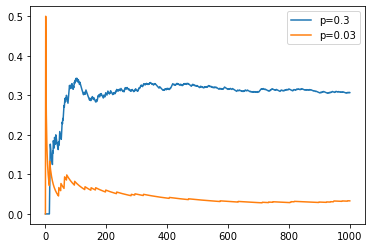

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

nn=np.arange(1,n+1)
plt.plot(nn, np.cumsum(X1)/nn,label='p=0.3')
plt.plot(nn, np.cumsum(X2)/nn, label='p=0.03')
plt.legend(loc='upper right')
plt.show()

**Exercise 2.10.21 (Computer Experiment)**. Suppose we flip a coin $n$ times and let $p$ denote the probability of heads.  Let $X$ be the number of heads.  We call $X$ a binomial random variable which is discussed in the next chapter.  Intuition suggests that $X$ will be close to $np$.  To see if this is true, we can repeat this experiment many times and average the $X$ values.  Carry out a simulation and compare the averages of the $X$'s to $np$.  Try this for $p = .3$ and $n = 10, 100, 1000$.

In [29]:
import numpy as np
from tqdm.notebook import tqdm

np.random.seed(0)

B=5000
p=0.3
X1_mean=np.empty(B)
X2_mean=np.empty(B)
X3_mean=np.empty(B)
for i in tqdm(range(B)):
    X1=np.where(np.random.uniform(low=0,high=1,size=10)<p,1,0)
    X2=np.where(np.random.uniform(low=0,high=1,size=100)<p,1,0)
    X3=np.where(np.random.uniform(low=0,high=1,size=1000)<p,1,0)
    X1_mean[i]=np.sum(X1)
    X2_mean[i]=np.sum(X2)
    X3_mean[i]=np.sum(X3)

In [30]:
print('X1 mean: %.3f' % (X1_mean.mean()), 'X1 np: %.3f' % (10*p))
print('X2 mean: %.3f' % (X2_mean.mean()), 'X2 np: %.3f' % (100*p))
print('X3 mean: %.3f' % (X3_mean.mean()), 'X3 np: %.3f' % (1000*p))

X1 mean: 3.039 X1 np: 3.000
X2 mean: 29.965 X2 np: 30.000
X3 mean: 300.023 X3 np: 300.000


Text(0.5, 1.0, 'n=1000')

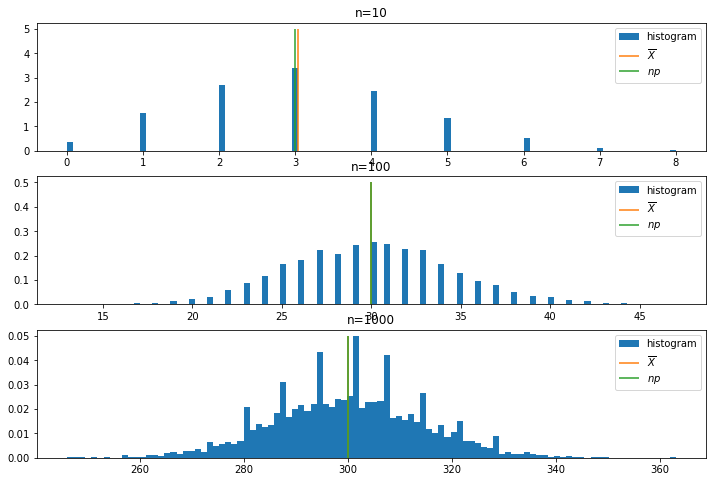

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

ax=plt.subplot(3,1,1)
ax.hist(X1_mean, density=True, bins=100, label='histogram', color='C0')
ax.vlines(X1_mean.mean(), ymin=0, ymax=5, label=r'$\overline{X}$', color='C1')
ax.vlines(3,ymin=0,ymax=5,label=r'$np$', color='C2')
ax.legend(loc='upper right')
ax.set_title('n=10')

ax=plt.subplot(3,1,2)
ax.hist(X2_mean, density=True, bins=100, label='histogram', color='C0')
ax.vlines(X2_mean.mean(), ymin=0, ymax=0.5, label=r'$\overline{X}$', color='C1')
ax.vlines(30,ymin=0,ymax=0.5,label=r'$np$', color='C2')
ax.legend(loc='upper right')
ax.set_title('n=100')

ax=plt.subplot(3,1,3)
ax.hist(X3_mean, density=True, bins=100, label='histogram', color='C0')
ax.vlines(X3_mean.mean(), ymin=0, ymax=0.05, label=r'$\overline{X}$', color='C1')
ax.vlines(300,ymin=0,ymax=0.05,label=r'$np$', color='C2')
ax.legend(loc='upper right')
ax.set_title('n=1000')

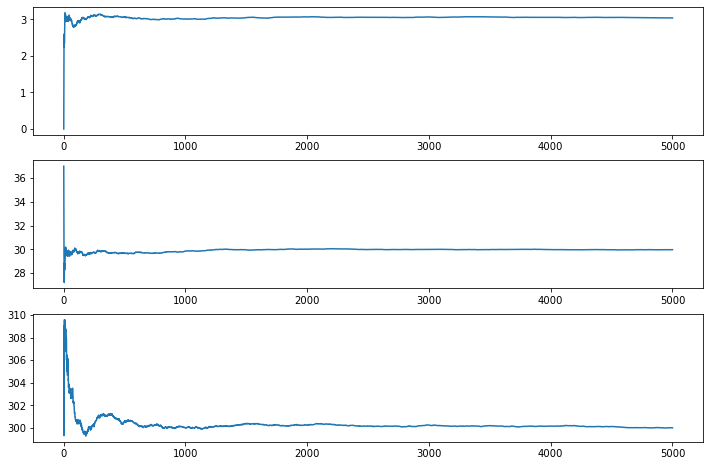

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

nn=np.arange(1,B+1)

plt.figure(figsize=(12,8))
ax=plt.subplot(3,1,1)
ax.plot(nn,np.cumsum(X1_mean)/nn,label='n=10')
ax=plt.subplot(3,1,2)
ax.plot(nn,np.cumsum(X2_mean)/nn,label='n=100')
ax=plt.subplot(3,1,3)
ax.plot(nn,np.cumsum(X3_mean)/nn,label='n=1000')

plt.show()

**Exercise 2.10.22 (Computer Experiment)**.  Here we will get some experience simulating conditional probabilities.  Consider tossing a fair die.  Let $A = \{2, 4, 6\}$ and $B = \{1, 2, 3, 4\}$.  Then $\mathbb{P}(A) = 1/2$, $\mathbb{P}(B) = 2/3$ and $\mathbb{P}(AB) = 1/3$.  Since $\mathbb{P}(AB) = \mathbb{P}(A) \mathbb{P}(B)$, the events $A$ and $B$ are independent.  Simulate draws from the sample space and verify that $\hat{P}(AB) = \hat{P}(A) \hat{P}(B)$ where $\hat{P}$ is the proportion of times an event occurred in the simulation.  Now find two events $A$ and $B$ that are not independent.  Compute $\hat{P}(A)$, $\hat{P}(B)$ and $\hat{P}(AB)$.  Compare the calculated values to their theoretical values.  Report your results and interpret.

In [33]:
import numpy as np

np.random.seed(0)

B=10000
results=np.random.randint(low=1, high=7, size=B)

In [34]:
A_hat=np.isin(results,[2,4,6])
B_hat=np.isin(results,[1,2,3,4])
AB_hat=np.isin(results,[2,4])

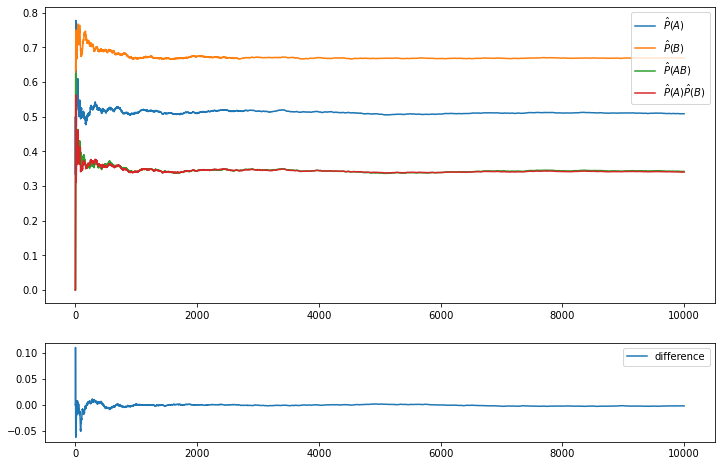

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

nn=np.arange(1, B+1)

f, (a0,a1)=plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(12,8))

a0.plot(nn,np.cumsum(A_hat)/nn, label=r'$\hat{P}(A)$')
a0.plot(nn,np.cumsum(B_hat)/nn, label=r'$\hat{P}(B)$')
a0.plot(nn,np.cumsum(AB_hat)/nn, label=r'$\hat{P}(AB)$')
a0.plot(nn,np.cumsum(A_hat)*np.cumsum(B_hat)/nn/nn, label=r'$\hat{P}(A) \hat{P}(B)$')
a0.legend(loc='upper right')

a1.plot(nn, np.cumsum(A_hat)*np.cumsum(B_hat)/nn/nn-np.cumsum(AB_hat)/nn, label='difference')
a1.legend(loc='upper right')

plt.show()

In [39]:
A_hat=np.isin(results,[2,4,6])
B_hat=np.isin(results,[2,4,5])
AB_hat=np.isin(results,[2,4])

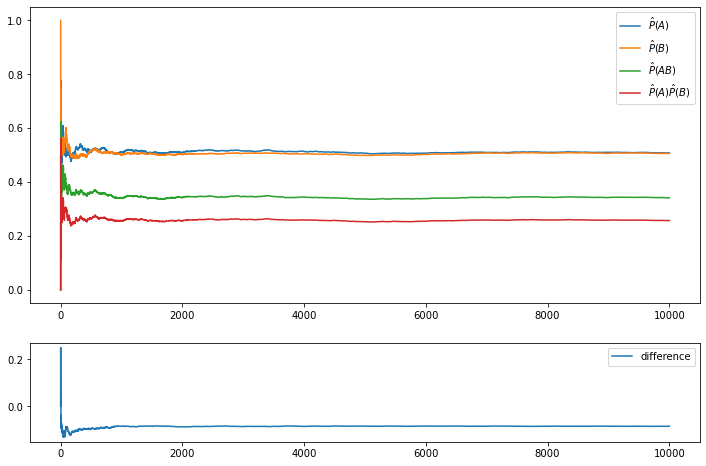

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

nn=np.arange(1, B+1)

f, (a0,a1)=plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(12,8))

a0.plot(nn,np.cumsum(A_hat)/nn, label=r'$\hat{P}(A)$')
a0.plot(nn,np.cumsum(B_hat)/nn, label=r'$\hat{P}(B)$')
a0.plot(nn,np.cumsum(AB_hat)/nn, label=r'$\hat{P}(AB)$')
a0.plot(nn,np.cumsum(A_hat)*np.cumsum(B_hat)/nn/nn, label=r'$\hat{P}(A) \hat{P}(B)$')
a0.legend(loc='upper right')

a1.plot(nn, np.cumsum(A_hat)*np.cumsum(B_hat)/nn/nn-np.cumsum(AB_hat)/nn, label='difference')
a1.legend(loc='upper right')

plt.show()